D207 Exploratory Data Analysis Performance Task

B1) Code

In [35]:
import numpy as np
import pandas as pd
from pandas import DataFrame

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Statistical Analysis packages
import pylab
import statsmodels.api as sm
import statistics as stat
from scipy import stats

#Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [37]:
#Load data set into Pandas dataframe
df = pd.read_csv('churn_clean.csv')

In [39]:
#Rename the last 8 survey columns for a better description of variables
df.rename(columns = {'Item1':'Timely_Resp', 
                    'Item2':'Equip_Fixes', 
                     'Item3':'Equip_Replace', 
                     'Item4':'Reliability', 
                     'Item5':'Options_Avail', 
                     'Item6':'CustServ_Respectfulness', 
                     'Item7':'CustServ_Courteous', 
                     'Item8':'CustServ_Listening'}, 
          inplace=True)

In [41]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Resp,Equip_Fixes,Equip_Replace,Reliability,Options_Avail,CustServ_Respectfulness,CustServ_Courteous,CustServ_Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [43]:
contingency = pd.crosstab(df['Churn'], df['Reliability'])
contingency

Reliability,1,2,3,4,5,6,7
Churn,,,,,,,
No,162,990,2524,2523,998,145,8
Yes,59,360,906,929,337,58,1


In [45]:
conting_pct = pd.crosstab(df['Churn'], df['Reliability'], normalize='index')
conting_pct

Reliability,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.022041,0.134694,0.343401,0.343265,0.135782,0.019728,0.001088
Yes,0.022264,0.135849,0.341887,0.350566,0.127170,0.021887,0.000377


<Axes: xlabel='Reliability', ylabel='Churn'>

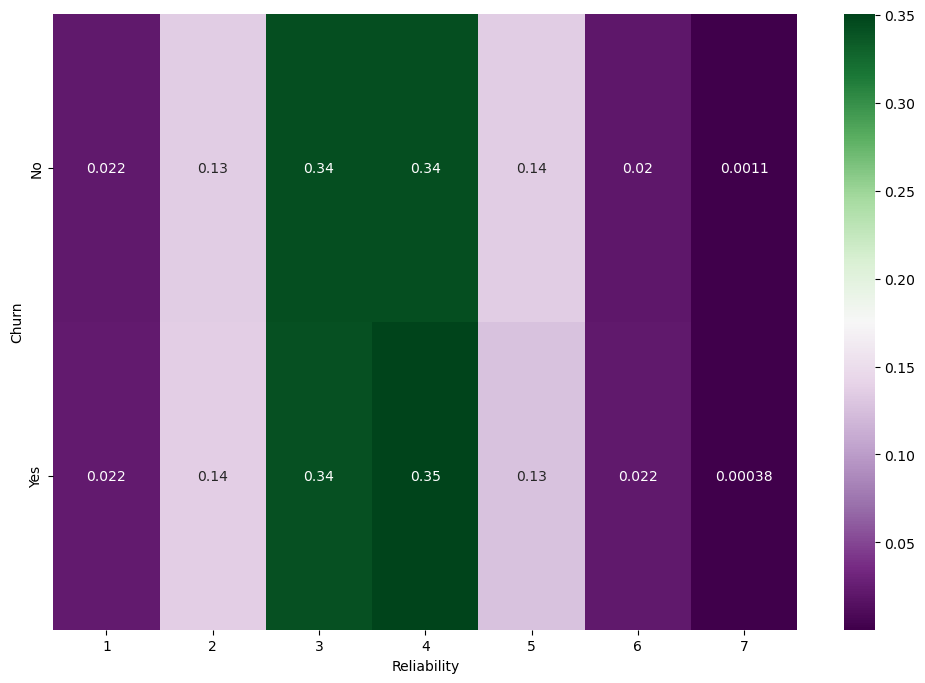

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(conting_pct, annot=True, cmap="PRGn")

B2) Output

In [49]:
#Chi-Square Test of Independence
c, p, dof, expected = chi2_contingency(contingency)
print('p-value = ' + str(p))

p-value = 0.8137137824222062


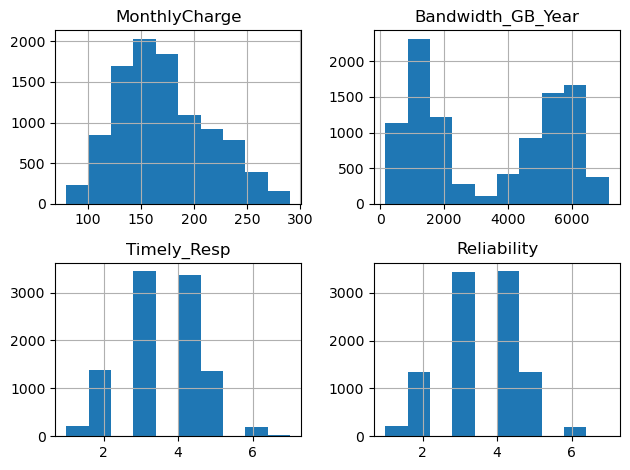

In [51]:
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Resp', 'Reliability']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

In [53]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Resp,Equip_Fixes,Equip_Replace,Reliability,Options_Avail,CustServ_Respectfulness,CustServ_Courteous,CustServ_Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


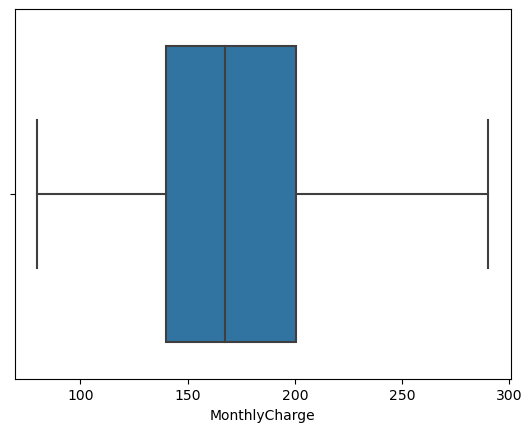

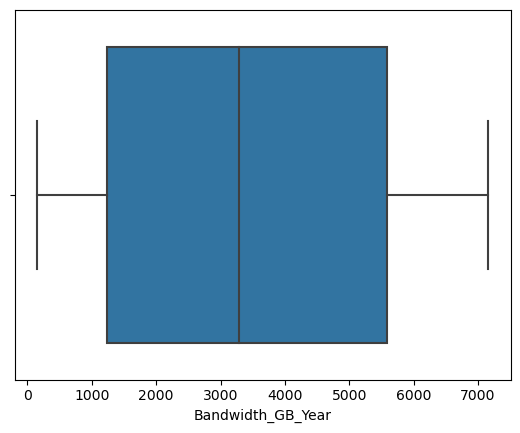

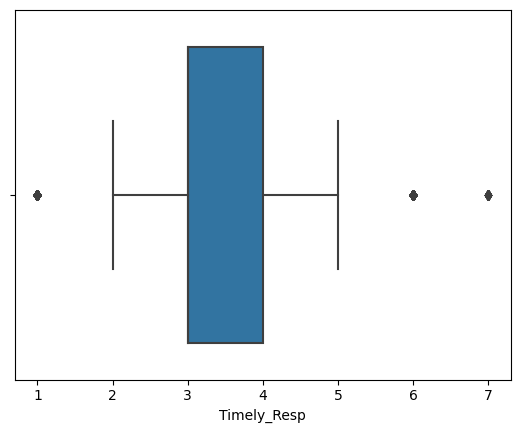

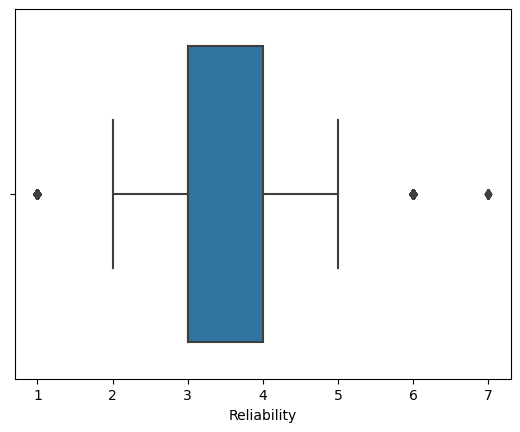

In [55]:
#Create boxplots for continuous & categorical variables
sns.boxplot(data=df, x='MonthlyCharge')
plt.show()

sns.boxplot(data=df, x='Bandwidth_GB_Year')
plt.show()

sns.boxplot(data=df, x='Timely_Resp')
plt.show()

sns.boxplot(data=df, x='Reliability')
plt.show()

In [57]:
#Create dataframe for bivariate analysis
churn_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Resp', 'Reliability']]

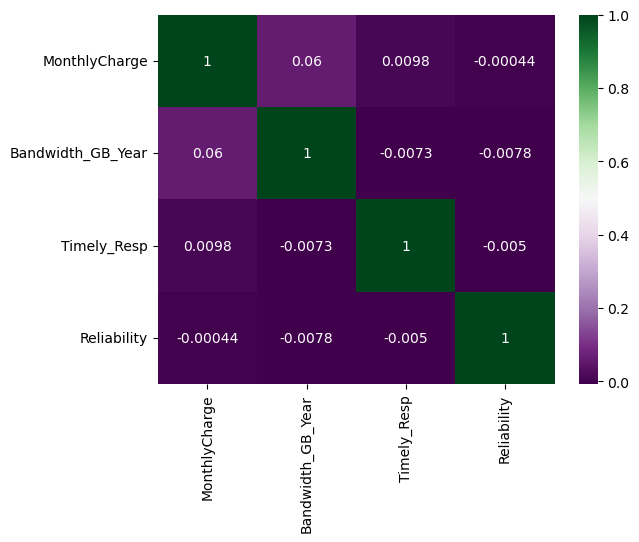

In [59]:
sns.heatmap(churn_bivariate.corr(), annot=True, cmap="PRGn")
plt.show()

<Axes: xlabel='Timely_Resp', ylabel='Reliability'>

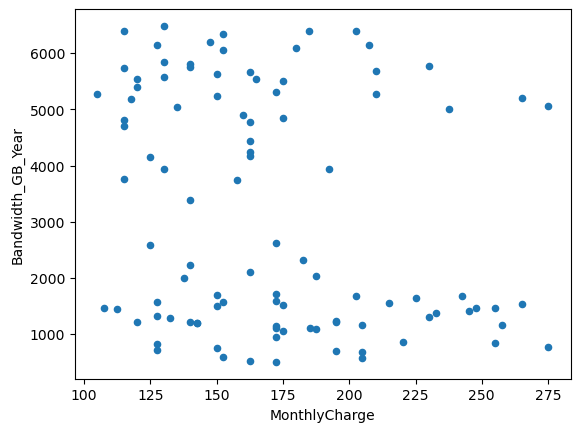

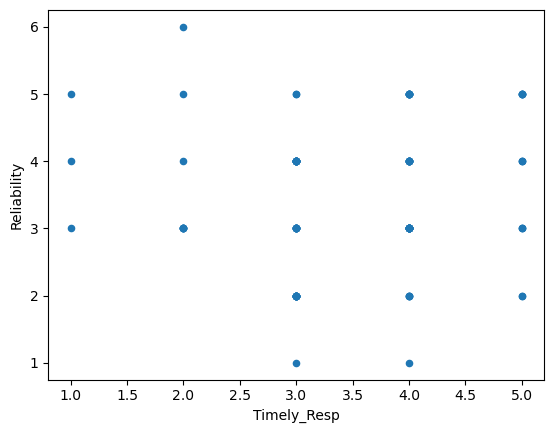

In [61]:
#Create a scatter plot of continuous variables
churn_bivariate[churn_bivariate
            ['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', y='Bandwidth_GB_Year')

#Create a scatter plot of categorical variables
churn_bivariate[churn_bivariate
            ['Timely_Resp'] < 7].sample(100).plot.scatter(x='Timely_Resp', y='Reliability')

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

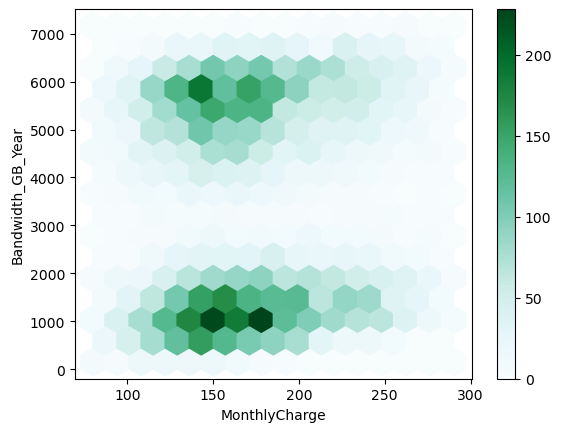

In [63]:
churn_bivariate[churn_bivariate
        ['MonthlyCharge'] < 300].plot.hexbin(x='MonthlyCharge', y='Bandwidth_GB_Year', gridsize=15)